In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('floating_population_2022_2024.csv')

In [3]:
df.head(-5)

,행정동명,남자 비율,여자 비율,총 이동인구(합),연월,0대 비율,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,60대 이상 비율
0,경기도 가평군 가평읍,0.544820,0.455171,105703.66,2022-04,0.007603,0.034706,0.200015,0.178733,0.163308,0.188300,0.227336
1,경기도 가평군 북면,0.542239,0.457730,31845.82,2022-04,0.014371,0.027993,0.176831,0.214446,0.160085,0.170207,0.236066
2,경기도 가평군 상면,0.532247,0.467742,85375.84,2022-04,0.007324,0.020827,0.115668,0.175905,0.180025,0.234174,0.266078
3,경기도 가평군 설악면,0.542350,0.457645,206349.46,2022-04,0.007750,0.026568,0.143040,0.196685,0.188257,0.215767,0.221933
4,경기도 가평군 조종면,0.612440,0.387543,53500.97,2022-04,0.007467,0.021096,0.115412,0.153690,0.176019,0.250616,0.275700
...,...,...,...,...,...,...,...,...,...,...,...,...
23678,서울특별시 중랑구 면목7동,0.530095,0.469901,342080.88,2024-06,0.005423,0.039178,0.150421,0.183307,0.150374,0.191307,0.279989
23679,서울특별시 중랑구 면목본동,0.540154,0.459844,583469.96,2024-06,0.004702,0.036663,0.183145,0.189863,0.133865,0.192794,0.258968
23680,서울특별시 중랑구 묵1동,0.523335,0.476662,531974.16,2024-06,0.006674,0.061064,0.152211,0.162784,0.152313,0.191662,0.273293
23681,서울특별시 중랑구 묵2동,0.524799,0.475199,502511.47,2024-06,0.006695,0.044568,0.175548,0.176336,0.141253,0.182839,0.272762


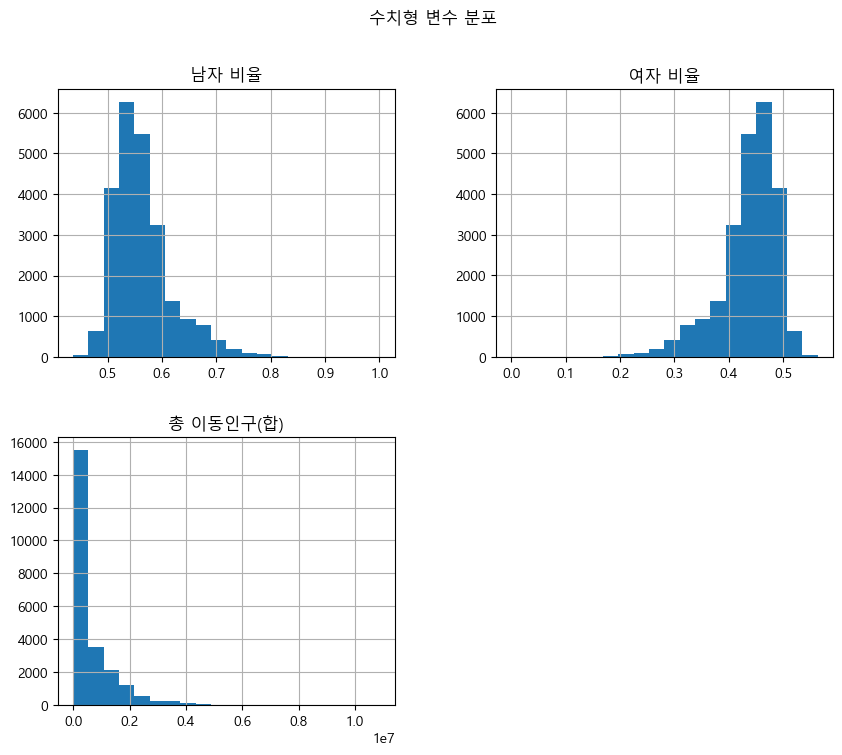

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS 환경일 경우

# 음수 표시를 위한 설정
plt.rcParams['axes.unicode_minus'] = False

# 이후 그래프를 다시 그리기
numeric_cols = ['남자 비율', '여자 비율', '총 이동인구(합)']
df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("수치형 변수 분포")
plt.show()


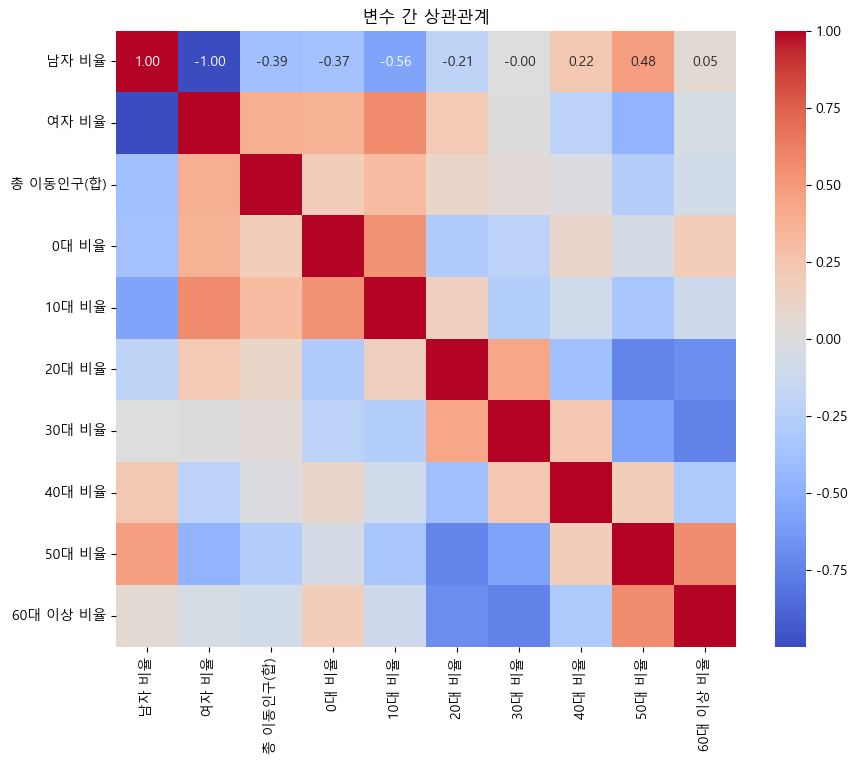

In [7]:
# 수치형 컬럼만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산 및 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("변수 간 상관관계")
plt.show()


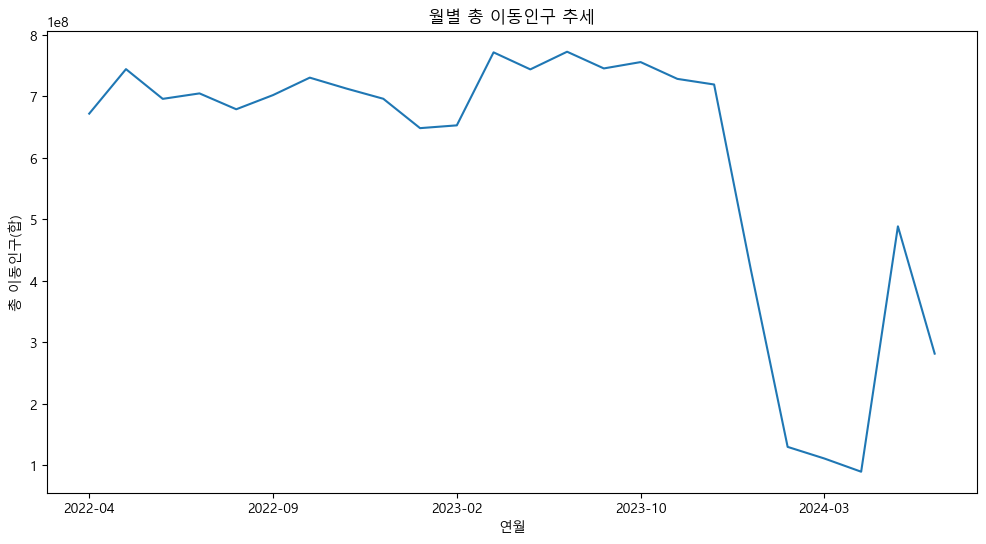

In [8]:
# 월별 이동인구 추세
monthly_population = df.groupby('연월')['총 이동인구(합)'].sum()

monthly_population.plot(figsize=(12, 6))
plt.title("월별 총 이동인구 추세")
plt.xlabel("연월")
plt.ylabel("총 이동인구(합)")
plt.show()


In [9]:
age_columns = ['0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율']
df[age_columns + ['총 이동인구(합)']].corr()


,0대 비율,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,60대 이상 비율,총 이동인구(합)
0대 비율,1.000000,0.532765,-0.294860,-0.219062,0.095401,-0.056694,0.182742,0.186747
10대 비율,0.532765,1.000000,0.157867,-0.273423,-0.098127,-0.341684,-0.105151,0.312410
20대 비율,-0.294860,0.157867,1.000000,0.429974,-0.390467,-0.732871,-0.690666,0.102638
30대 비율,-0.219062,-0.273423,0.429974,1.000000,0.228481,-0.575812,-0.746600,0.036824
40대 비율,0.095401,-0.098127,-0.390467,0.228481,1.000000,0.186582,-0.303213,-0.021185
50대 비율,-0.056694,-0.341684,-0.732871,-0.575812,0.186582,1.000000,0.559035,-0.268596
60대 이상 비율,0.182742,-0.105151,-0.690666,-0.746600,-0.303213,0.559035,1.000000,-0.080214
총 이동인구(합),0.186747,0.312410,0.102638,0.036824,-0.021185,-0.268596,-0.080214,1.000000


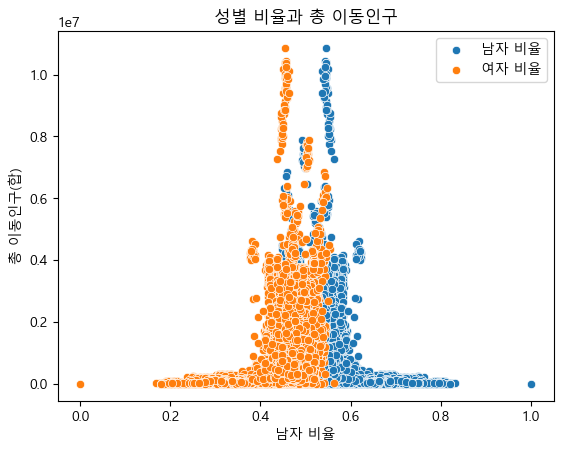

In [10]:
# 성별 비율과 총 이동인구의 산점도
sns.scatterplot(x='남자 비율', y='총 이동인구(합)', data=df, label='남자 비율')
sns.scatterplot(x='여자 비율', y='총 이동인구(합)', data=df, label='여자 비율')
plt.legend()
plt.title("성별 비율과 총 이동인구")
plt.show()


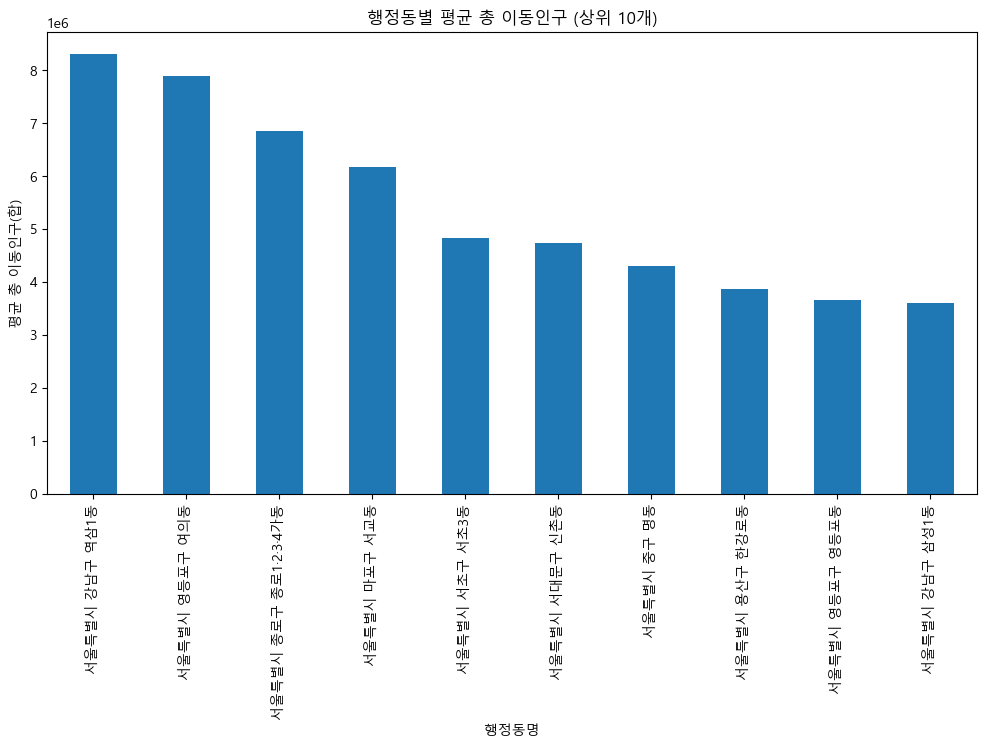

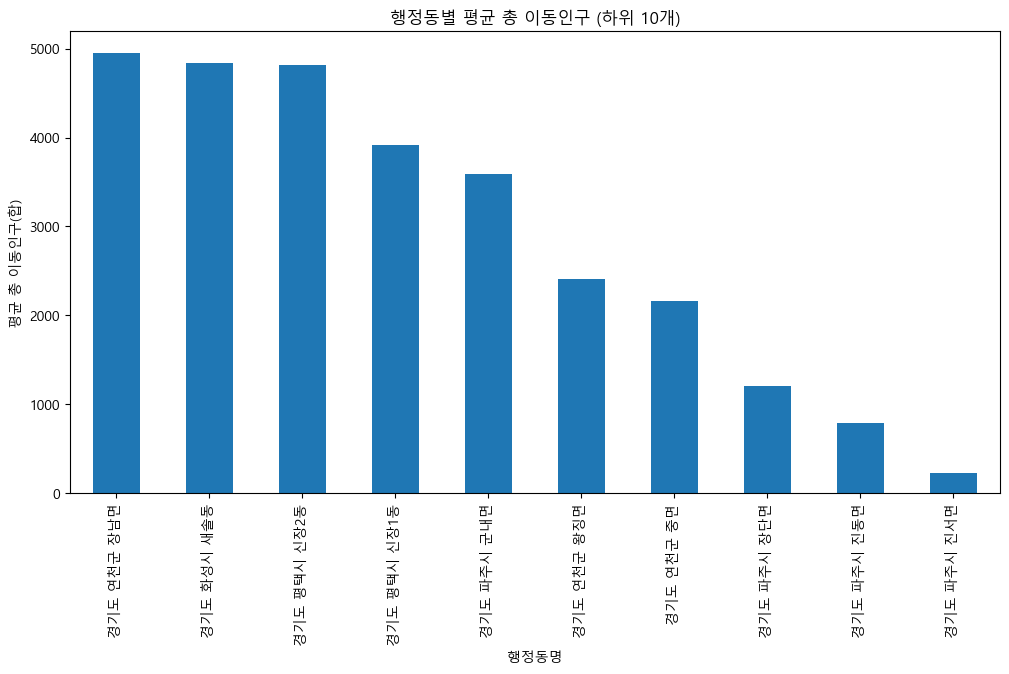

In [13]:
import matplotlib.pyplot as plt

# 상위 10개 및 하위 10개의 행정동별 평균 총 이동인구 데이터 추출
top_10_districts = district_population.head(10)
bottom_10_districts = district_population.tail(10)

# 상위 10개 시각화
plt.figure(figsize=(12, 6))
top_10_districts.plot(kind='bar')
plt.title("행정동별 평균 총 이동인구 (상위 10개)")
plt.xlabel("행정동명")
plt.ylabel("평균 총 이동인구(합)")
plt.show()

# 하위 10개 시각화
plt.figure(figsize=(12, 6))
bottom_10_districts.plot(kind='bar')
plt.title("행정동별 평균 총 이동인구 (하위 10개)")
plt.xlabel("행정동명")
plt.ylabel("평균 총 이동인구(합)")
plt.show()


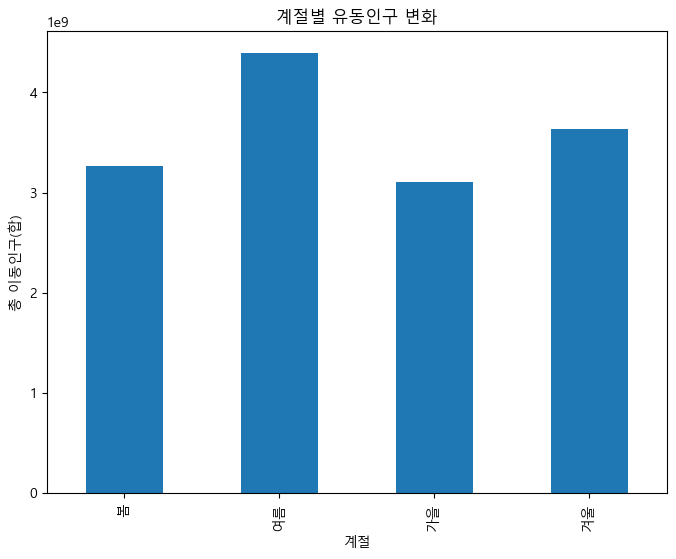

In [15]:
# 연월을 기준으로 계절별 유동인구 합계 계산
df['연월'] = pd.to_datetime(df['연월'])
df['계절'] = df['연월'].dt.month % 12 // 3 + 1  # 계절 계산 (봄=1, 여름=2, 가을=3, 겨울=4)
season_population = df.groupby('계절')['총 이동인구(합)'].sum()

# 시각화
season_population.plot(kind='bar', figsize=(8, 6))
plt.title("계절별 유동인구 변화")
plt.xlabel("계절")
plt.ylabel("총 이동인구(합)")
plt.xticks(ticks=[0, 1, 2, 3], labels=['봄', '여름', '가을', '겨울'])
plt.show()


In [19]:
age_columns = ['0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율']
age_corr = df[age_columns + ['총 이동인구(합)']].corr()['총 이동인구(합)'].sort_values(ascending=False)

# 상관계수 출력
print("연령대 비율과 총 이동인구 상관계수:")
print(age_corr)


연령대 비율과 총 이동인구 상관계수:
총 이동인구(합)    1.000000
10대 비율       0.312410
0대 비율        0.186747
20대 비율       0.102638
30대 비율       0.036824
40대 비율      -0.021185
60대 이상 비율   -0.080214
50대 비율      -0.268596
Name: 총 이동인구(합), dtype: float64


In [20]:
# 성별 비율과 총 이동인구 간의 상관계수 계산
gender_corr = df[['남자 비율', '여자 비율', '총 이동인구(합)']].corr()['총 이동인구(합)'].sort_values(ascending=False)

# 상관계수 출력
print("성별 비율과 총 이동인구 상관계수:")
print(gender_corr)


성별 비율과 총 이동인구 상관계수:
총 이동인구(합)    1.000000
여자 비율        0.387651
남자 비율       -0.387571
Name: 총 이동인구(합), dtype: float64


C:\Users\turtl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


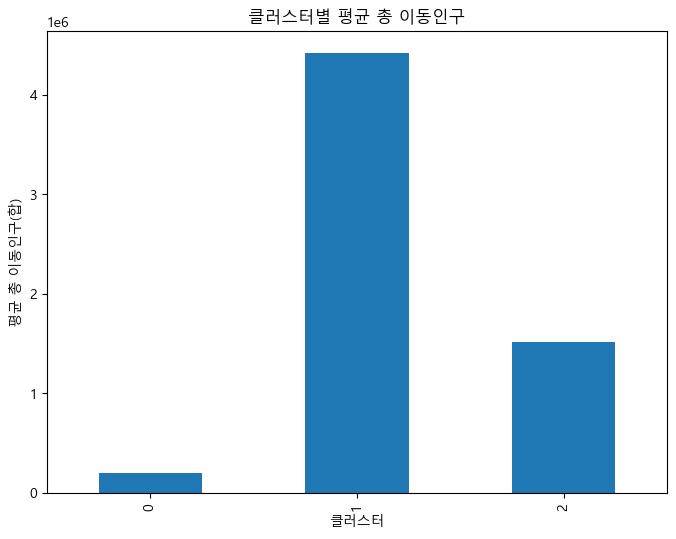

In [21]:
from sklearn.cluster import KMeans

# 유동인구와 관련된 주요 변수 선택
features = df[['총 이동인구(합)', '남자 비율', '여자 비율']]
features = features.dropna()

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df['클러스터'] = kmeans.fit_predict(features)

# 클러스터별 유동인구 평균
cluster_population = df.groupby('클러스터')['총 이동인구(합)'].mean()

# 시각화
cluster_population.plot(kind='bar', figsize=(8, 6))
plt.title("클러스터별 평균 총 이동인구")
plt.xlabel("클러스터")
plt.ylabel("평균 총 이동인구(합)")
plt.show()


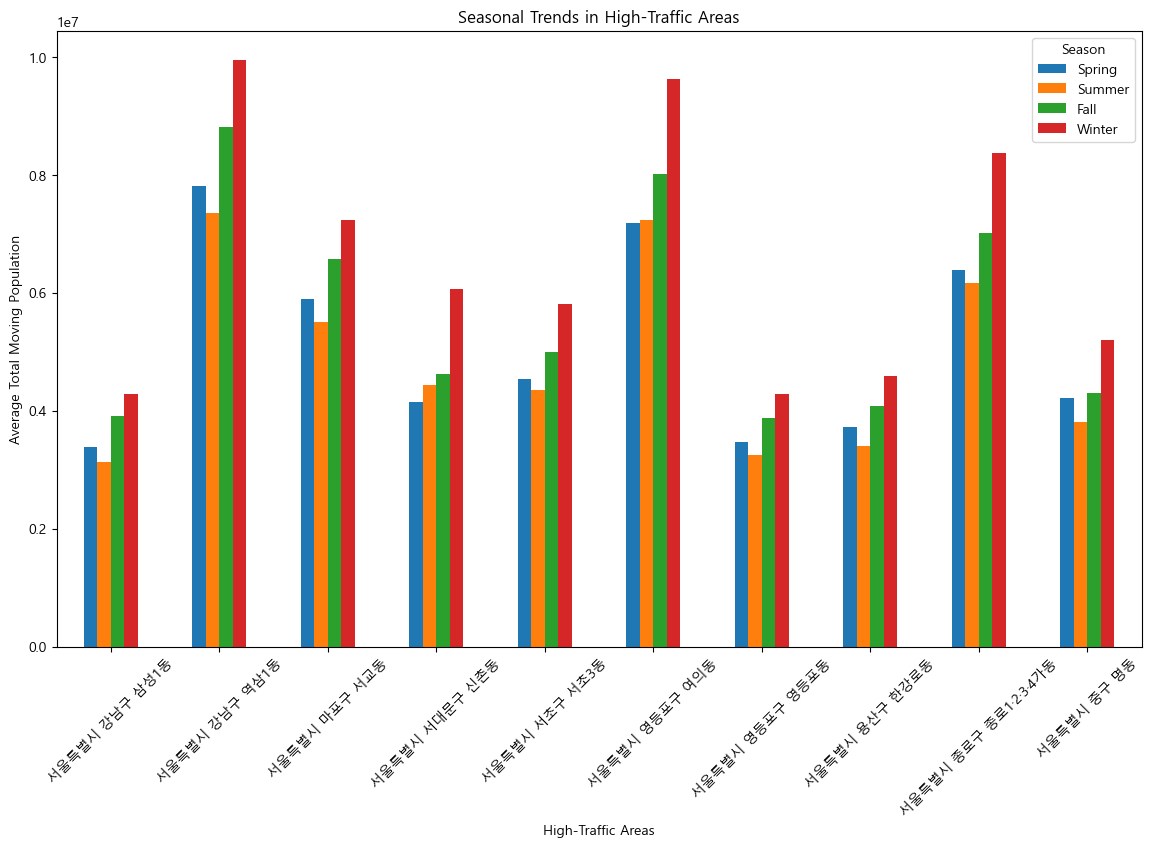

In [23]:
# Convert the '연월' column to datetime format if not already, and extract the season information
df['연월'] = pd.to_datetime(df['연월'], format='%Y-%m')
df['계절'] = df['연월'].dt.month % 12 // 3 + 1  # 계절 계산 (봄=1, 여름=2, 가을=3, 겨울=4)

# Filter the data for the top 10 high-traffic areas (based on the earlier calculated 'top_10_districts')
high_traffic_areas = df[df['행정동명'].isin(top_10_districts.index)]

# Group by '도착 행정동 이름' and '계절' to calculate the average population for each season in high-traffic areas
seasonal_trends = high_traffic_areas.groupby(['행정동명', '계절'])['총 이동인구(합)'].mean().unstack()

# Plot the seasonal trends for high-traffic areas
seasonal_trends.plot(kind='bar', figsize=(14, 8))
plt.title("Seasonal Trends in High-Traffic Areas")
plt.xlabel("High-Traffic Areas")
plt.ylabel("Average Total Moving Population")
plt.xticks(rotation=45)
plt.legend(['Spring', 'Summer', 'Fall', 'Winter'], title="Season")
plt.show()


In [27]:
gender_corr = df[['남자 비율', '여자 비율', '총 이동인구(합)']].corr()['총 이동인구(합)'].sort_values(ascending=False)

print("성별 비율과 총 이동인구 상관계수:")
print(gender_corr)

성별 비율과 총 이동인구 상관계수:
총 이동인구(합)    1.000000
여자 비율        0.387651
남자 비율       -0.387571
Name: 총 이동인구(합), dtype: float64


In [28]:
#지역별 유동인구와 평균 주거 가격의 관게

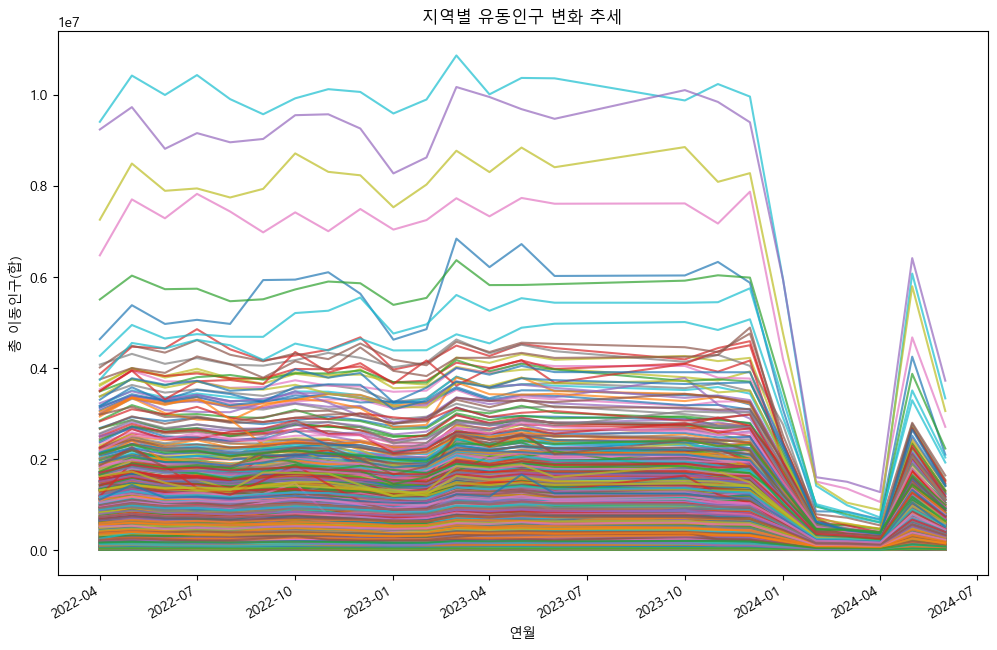

In [30]:
# '연월'을 기준으로 지역별 유동인구 변화 추세 분석
trend_df = df.groupby(['행정동명', '연월'])['총 이동인구(합)'].sum().unstack().T

# 시각화
trend_df.plot(figsize=(12, 8), legend=False, alpha=0.7)
plt.title("지역별 유동인구 변화 추세")
plt.xlabel("연월")
plt.ylabel("총 이동인구(합)")
plt.show()


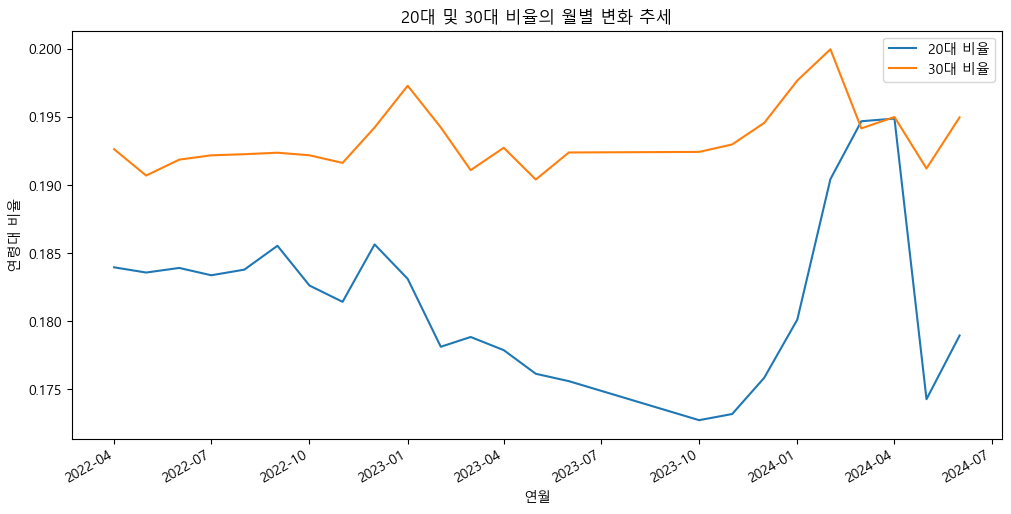

In [31]:
# 20대, 30대 비율의 월별 평균 변화 추이 분석
age_group_trend = df.groupby('연월')[['20대 비율', '30대 비율']].mean()

# 시각화
age_group_trend.plot(kind='line', figsize=(12, 6))
plt.title("20대 및 30대 비율의 월별 변화 추세")
plt.xlabel("연월")
plt.ylabel("연령대 비율")
plt.show()


In [32]:
#상업 시설 수 증가와의 관계 (추가 데이터 필요 시)